In [ ]:
  import pandas as pd
  import numpy as np

  #Creating the dataframe with all data

  t = {
      'Scenario' : ['w1', 'w2','w3','w4','w5'],
      'Probability': [0.2, 0.2, 0.3, 0.2, 0.1],
      'R1': [0.03, 0.17, 0.28, 0.05, -0.04],
      'R2': [0.09, 0.16, 0.10, 0.02, 0.15]
  }

  df = pd.DataFrame(t)

  #Expected Return
  er_R1 = (df['Probability'] * (df['R1'])).sum()
  er_R2 = (df['Probability'] * (df['R2'])).sum()

  #Standard Deviation
  var_R1 = (df['Probability'] * ((df['R1'] - er_R1)**2)).sum()
  stdev_R1 = np.sqrt(var_R1)

  var_R2 = (df['Probability'] * ((df['R2'] - er_R2)**2)).sum()
  stdev_R2 = np.sqrt(var_R2)

  #Pearson Correlation
  cov_R1_R2 = (df['Probability'] * (df['R1'] - er_R1) * (df['R2'] - er_R2)).sum()
  pcc_R1_R2 = cov_R1_R2 / (stdev_R1 * stdev_R2)

  print('Expected Return of R1: ', er_R1)
  print('Expected Return of R2: ', er_R2)
  print('Standard Deviation of R1: ', stdev_R1)
  print('Standard Deviation of R2: ', stdev_R2)
  print('Pearson Correlation Coefficient: ', pcc_R1_R2)


Expected Return of R1:  0.13
Expected Return of R2:  0.099
Standard Deviation of R1:  0.11506519890914021
Standard Deviation of R2:  0.04763402145525822
Pearson Correlation Coefficient:  0.20251711796879424


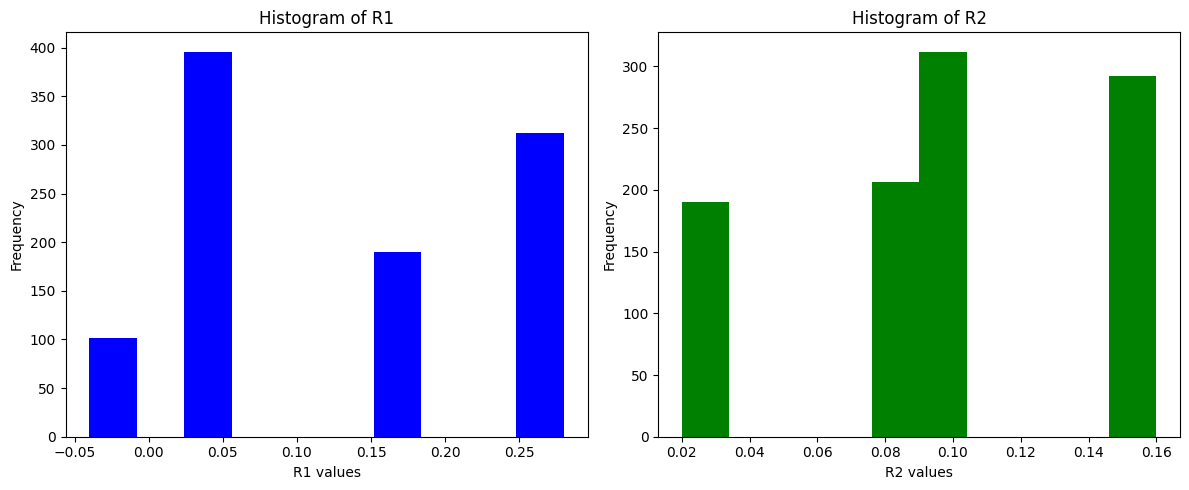

Mean of R1:  0.13126000000000018
Standard deviation of R1:  0.11638819699608666
Mean of R2:  0.09923999999999963
Standard deviation of R2:  0.04663713541803364
Pearson Correlation Coefficient:  0.18643245087567442


In [ ]:
  import matplotlib.pyplot as plt
  import numpy as np

  R1_trials = []
  R2_trials = []

  #Number of trials
  N = 1000

  for _ in range(N) :
    X = np.random.uniform(0,1)

    if X < 0.2 :
      R1 = df["R1"][0]
      R2 = df["R2"][0]

    elif X < 0.4 :
      R1 = df["R1"][1]
      R2 = df["R2"][1]

    elif X < 0.7 :
      R1 = df["R1"][2]
      R2 = df["R2"][2]

    elif X < 0.9 :
      R1 = df["R1"][3]
      R2 = df["R2"][3]
    else :
      R1 = df["R1"][4]
      R2 = df["R2"][4]

    R1_trials.append(R1)
    R2_trials.append(R2)

  R1_trials = np.array(R1_trials)
  R2_trials = np.array(R2_trials)

  #Computing Expected Values/Stdev/PCC

  er_s_R1 = sum(R1_trials) / N
  er_s_R2 = sum(R2_trials) / N

  var_s_R1 = sum((R1_trials - er_s_R1)**2) / N
  stdev_s__R1 = np.sqrt(var_s_R1)

  var_s_R2 = sum((R2_trials - er_s_R2)**2) / N
  stdev_s__R2 = np.sqrt(var_s_R2)

  cov_s_R1_R2 = sum((R1_trials - er_s_R1) * (R2_trials - er_s_R2)) / N
  pcc_s_R1_R2 = cov_s_R1_R2/ (stdev_s__R1 * stdev_s__R2)

  #Plotting Histograms
  plt.figure(figsize=(12, 5))

  plt.subplot(1, 2, 1)
  plt.hist(R1_trials, bins=10, color='blue')
  plt.title('Histogram of R1')
  plt.xlabel('R1 values')
  plt.ylabel('Frequency')

  plt.subplot(1, 2, 2)
  plt.hist(R2_trials, bins=10, color='green')
  plt.title('Histogram of R2')
  plt.xlabel('R2 values')
  plt.ylabel('Frequency')

  plt.tight_layout()
  plt.show()

  print('Mean of R1: ', er_s_R1)
  print('Standard deviation of R1: ', stdev_s__R1)
  print('Mean of R2: ',er_s_R2)
  print('Standard deviation of R2: ', stdev_s__R2)
  print('Pearson Correlation Coefficient: ', pcc_s_R1_R2)

In [ ]:
  import numpy as np

  comparison = {
      'Data Measurements' : ['Expected Return of R1', 'Expected Return of R2',
                              'Standard Deviation of R1', 'Standard Deviation of R2',
                              'Pearson Correlation Correlation'],
      'Actual': [er_R1, er_R2, stdev_R1, stdev_R2, pcc_R1_R2],
      'Simulated': [er_s_R1, er_s_R2, stdev_s__R1, stdev_s__R2, pcc_s_R1_R2]
  }

  df_comparison = pd.DataFrame(comparison)
  print(df_comparison)


                 Data Measurements    Actual  Simulated
0            Expected Return of R1  0.130000   0.131260
1            Expected Return of R2  0.099000   0.099240
2         Standard Deviation of R1  0.115065   0.116388
3         Standard Deviation of R2  0.047634   0.046637
4  Pearson Correlation Correlation  0.202517   0.186432
